In [9]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Defining the confusion matrix 
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [6]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8625
0.8333333333333334


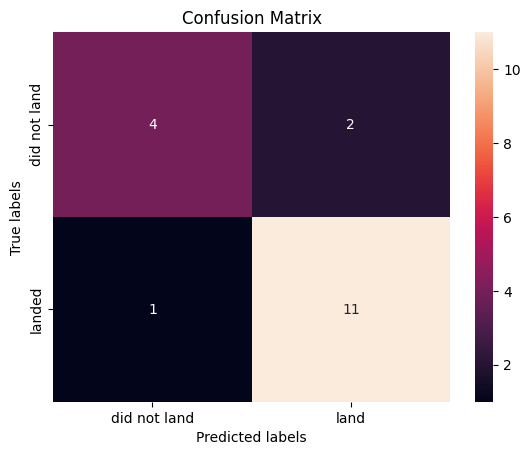

In [43]:
#Converting our Targer variable to make suitable for modeling 
Y = data['Class'].values
#Standardizing the Predictor variables 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

#Splitting our data into train and test set using train test split 
trainx,testx,trainy,testy =train_test_split(X,Y,test_size = 0.2,random_state = 1)

#Building a logistic regression model 
#Creating a model instance 
LR_model = LogisticRegression()

#Defining the hyper parameters 
lr_param = {"C":[0.01,0.1,1],
         'penalty':['l2',],

         'solver':['lbfgs']} 
#Using the grid search 
#Creating the grid seacrch instance 
Grid_LR = GridSearchCV(LR_model, lr_param, cv =10)
#Ftting the grid model with the entire dataset 
Grid_LR.fit(trainx,trainy)
#Outputing the best model and parameters 
print(Grid_LR.best_params_)
print(Grid_LR.best_score_)

#Predicting using the test data   
LR_yhat = Grid_LR.predict(testx)
print(Grid_LR.score(testx,testy))
#Evaluating the model using the confusion matrix 
plot_confusion_matrix(testy,LR_yhat)

{'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
0.8625
0.8888888888888888


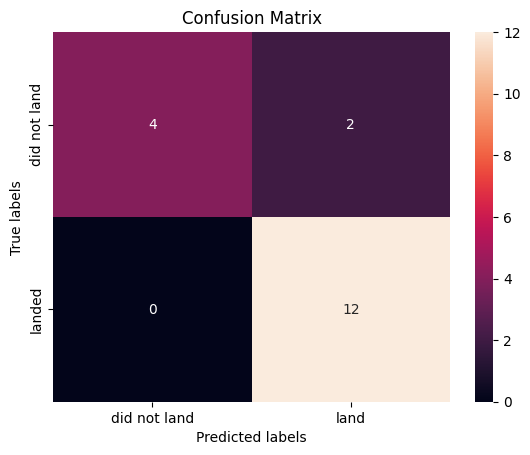

In [44]:
#Building an SVM model 
#Creating the model instance
svm_model = SVC()

#Defining the model hyper parameters 
svm_param = {'kernel':('linear','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5) 
            } 

#Creating an instance of the gridsearch 
Grid_svm = GridSearchCV(svm_model, svm_param,cv =10)

#Fitting the training data to get the best model
Grid_svm.fit(trainx,trainy)

#Outputing the best model and parameters
print(Grid_svm.best_params_)
print(Grid_svm.best_score_)

#Predicting using the test data 
SVM_yhat = Grid_svm.predict(testx)
print(Grid_svm.score(testx,testy))
#Evaluating the model using the confusion matrix 
plot_confusion_matrix(testy,SVM_yhat)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
0.9035714285714287
0.7222222222222222


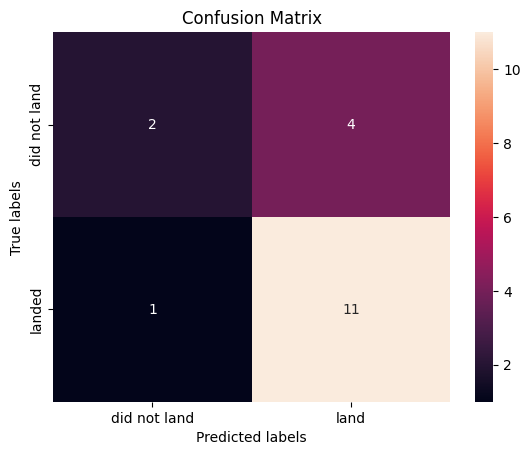

In [45]:
#Building a Decision Tree model 
#First we create the model instance
tree = DecisionTreeClassifier()

#Next we Define the tree hyper parameters 
tree_param = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#Next we create the grid search algorithm instance
Grid_tree = GridSearchCV(tree, tree_param, cv = 10)

#Next we fit the grid search algorithm with the train dataset to look for the best paamtere and model 
Grid_tree.fit(trainx,trainy)

#Outputting the best parameter and model 
print(Grid_tree.best_params_)
print(Grid_tree.best_score_)

#Making prediction onthe test data 
tree_yhat = Grid_tree.predict(testx)
print(Grid_tree.score(testx,testy))

#Evaluating the model using the confusion matrix 
plot_confusion_matrix(testy,tree_yhat)

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
0.8892857142857142
0.7777777777777778


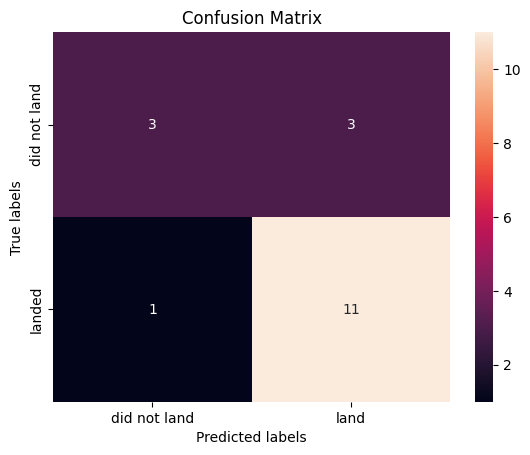

In [47]:
#Building a KNN model 
#First we Create the model instance
KNN_model=KNeighborsClassifier()

#Defining the KNN parameters 
KNN_param = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
#Next we create the grid search instance 
Grid_KNN = GridSearchCV(KNN_model,KNN_param,cv= 10)

#Next we fit the grid model with our train data set to output the best parameters
Grid_KNN.fit(trainx,trainy)

#Outputing the best parameters and model for the Grid_KNN
print(Grid_KNN.best_params_)
print(Grid_KNN.best_score_)

#Predicting using the test data 
KNN_yhat = Grid_KNN.predict(testx)
print(Grid_KNN.score(testx,testy))

#Evaluating the model using the confusion matrix 
plot_confusion_matrix(testy,KNN_yhat)

In [42]:
testx.shape

(18, 83)